In [2]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import string
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

from sklearn import preprocessing, utils, tree, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn. metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [3]:
file = "youth_smoking_drug_data_10000_rows_expanded.csv"
df = pd.read_csv(file)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])
df = pd.DataFrame(scaled_data, columns=numeric_columns)
print(df.head())


   Year  Smoking_Prevalence  Drug_Experimentation  Peer_Influence  \
0  1.00            0.307778              0.373396        0.444444   
1  1.00            0.664000              0.526254        0.555556   
2  0.75            0.822222              0.780130        0.555556   
3  1.00            0.638889              0.548425        1.000000   
4  0.75            0.953333              0.493749        0.000000   

   Family_Background  Mental_Health  Parental_Supervision  Community_Support  \
0           0.000000       0.444444              0.333333           0.222222   
1           1.000000       0.444444              0.888889           0.888889   
2           0.111111       0.666667              0.111111           0.444444   
3           0.888889       0.666667              0.111111           1.000000   
4           0.111111       0.333333              0.333333           1.000000   

   Media_Influence  
0         0.000000  
1         0.222222  
2         0.000000  
3         0.888889  

In [4]:
# Task 1

In [5]:
X = df.drop('Year', axis=1);
y = df['Year'];

principal_components = PCA(n_components=2)
X_pca = principal_components.fit_transform(X)
X_pca = pd.DataFrame({'principal_component_1': X_pca[:,0], 'principal_component_2': X_pca[:,1]})
pca_df = pd.concat([X_pca, y], axis = 1)
pca_df.describe()

,principal_component_1,principal_component_2,Year
count,1.000000e+04,1.000000e+04,10000.000000
mean,-1.634248e-17,3.197442e-18,0.500125
std,3.246310e-01,3.215728e-01,0.356257
min,-1.019457e+00,-8.283456e-01,0.000000
25%,-2.297029e-01,-2.478120e-01,0.250000
50%,6.561972e-04,-2.528826e-03,0.500000
75%,2.272074e-01,2.475407e-01,0.750000
max,1.145109e+00,8.762921e-01,1.000000


<Axes: xlabel='principal_component_1', ylabel='principal_component_2'>

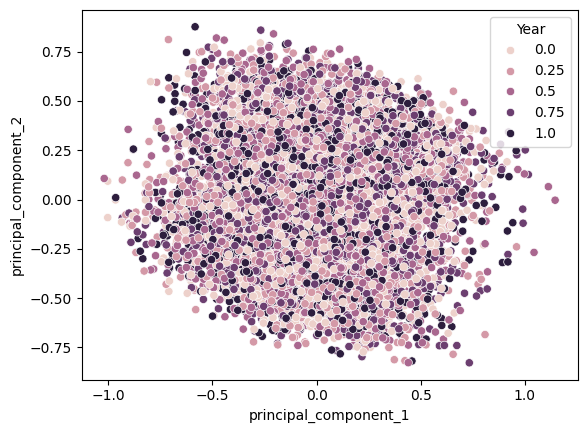

In [6]:
sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='Year') 

In [7]:
tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X)
X_tsne=pd.DataFrame({'tsne_1': X_tsne[:,0], 'tsne_2': X_tsne[:,1]})
tsne_df = pd.concat([X_tsne, y], axis = 1)
tsne_df.describe()

,tsne_1,tsne_2,Year
count,10000.000000,10000.000000,10000.000000
mean,-0.730954,0.232609,0.500125
std,38.829174,37.512653,0.356257
min,-83.473122,-80.559853,0.000000
25%,-31.928891,-30.055062,0.250000
50%,-0.383469,1.825051,0.500000
75%,29.557501,29.654356,0.750000
max,83.908249,78.615730,1.000000


<Axes: xlabel='tsne_1', ylabel='tsne_2'>

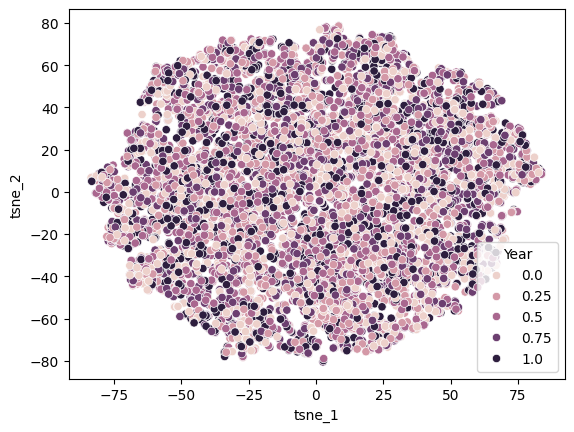

In [8]:
sns.scatterplot(data=tsne_df, x='tsne_1', y='tsne_2', hue='Year')

In [9]:
# Task 2

In [10]:
n_colors = [64, 32, 16, 8, 4, 2]
img = Image.open('img.jpg')

img = np.array(img, dtype=np.float64) / 255

w, h, d = original_shape = tuple(img.shape)
assert d == 3
img_array = np.reshape(img, (w * h, d))

img_array_sample = shuffle(img_array, random_state=0, n_samples=1_000)
kmeans_arr = []
labels_arr = []
for i in range(len(n_colors)):
    kmeans_arr.append(KMeans(n_clusters=n_colors[i], random_state=0).fit(img_array_sample))
    labels_arr.append(kmeans_arr[i].predict(img_array))

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1);

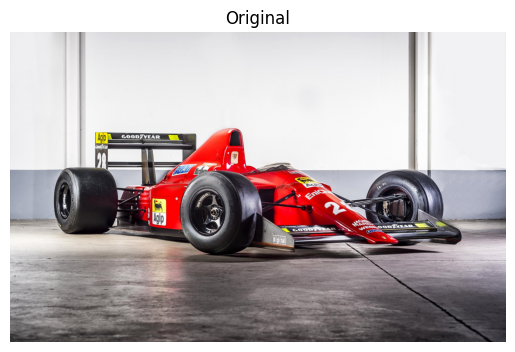

In [11]:
plt.figure(i)
plt.clf()
plt.axis("off")
plt.title("Original")
plt.imshow(img)

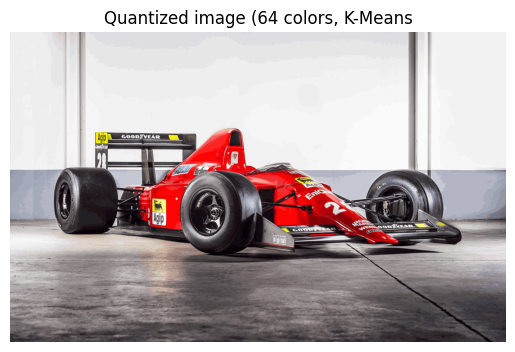

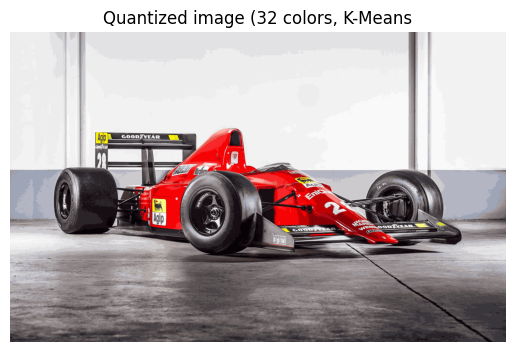

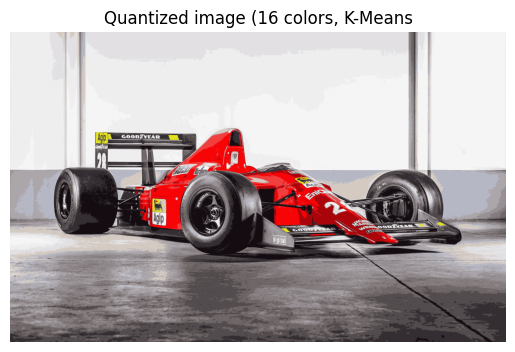

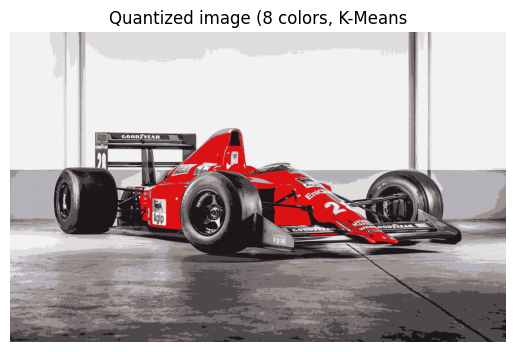

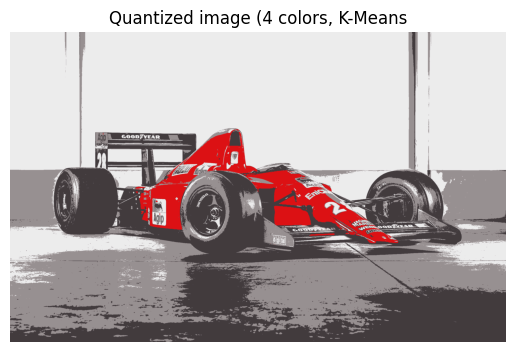

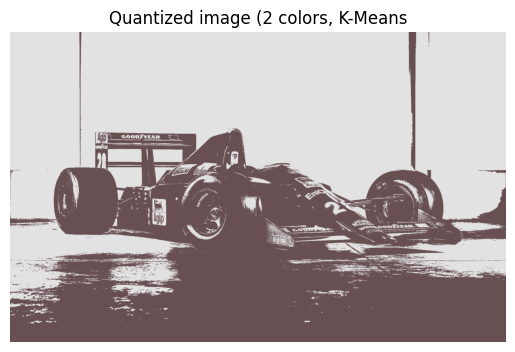

In [12]:
for i in range(len(n_colors)):
    plt.figure(i+1)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors[i]} colors, K-Means")
    plt.imshow(recreate_image(kmeans_arr[i].cluster_centers_, labels_arr[i], w, h))

In [13]:
# Task 3

In [14]:
#import csv

#raw_file = "SMSSpamCollection"
#csv_file = "SMSSpamCollection.csv"

#with open(raw_file, 'r', encoding='utf-8') as infile:
#    with open(csv_file, 'w', newline='', encoding='utf-8') as outfile:
#        writer = csv.writer(outfile)    
#        writer.writerow(["Category", "Message"])     
#        for line in infile:
#            if line.strip():
#                category, message = line.split('\t', 1)
#                writer.writerow([category.strip(), message.strip()])

#print(f"Saved as {csv_file}")

In [15]:
df = pd.read_csv('SMSSpamCollection.csv', encoding='latin-1')
# https://archive.ics.uci.edu/dataset/228/sms+spam+collection
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
def cleaning(value):
    punctuation_cleaning = []
    stopwords_cleaning_string = ''
    
    for i in value:
        if i not in string.punctuation:
            punctuation_cleaning.append(i)
    punctuation_cleaning = "".join(punctuation_cleaning).split()
    
    for j in punctuation_cleaning:
        if j.lower() not in stopwords.words("english"):
            stopwords_cleaning_string += j.lower() + ' '
    
    return stopwords_cleaning_string

df['Message'] = df['Message'].apply(cleaning)

df.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [17]:
def visualisation(Category):
    text = ' '.join(df[df['Category'] == Category]['Message'])
    stopwords = set(wordcloud.STOPWORDS)
    wc_figure = wordcloud.WordCloud(stopwords=STOPWORDS, background_color='lightgrey', width=900, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(wc_figure)  
    plt.axis('off')
    plt.show()

In [18]:
# Visualisation

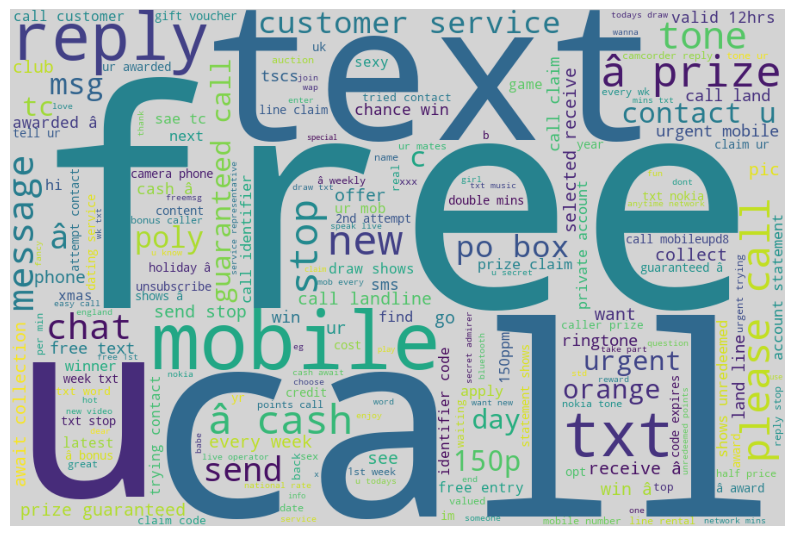

In [19]:
visualisation('spam')

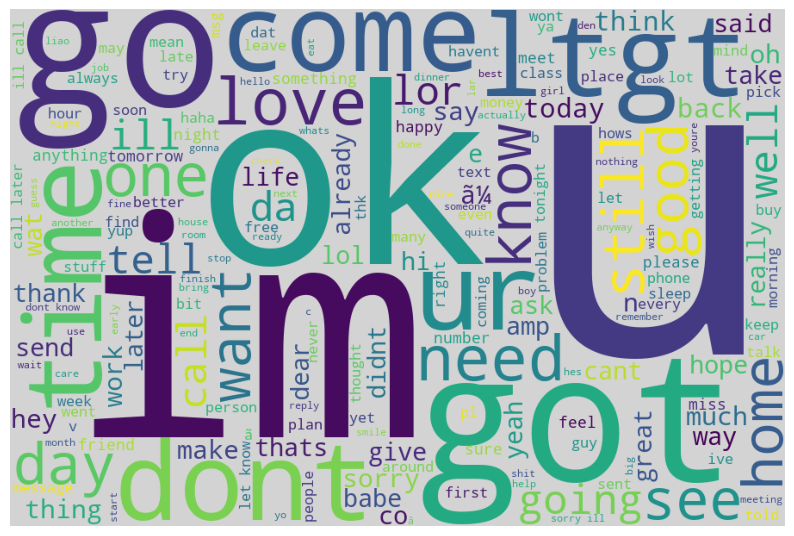

In [20]:
visualisation('ham')

In [21]:
# Vectorizing

In [22]:
X = df['Message']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
tfidfv = TfidfVectorizer()
X_train_vectorised = tfidfv.fit_transform(X_train)
X_test_vectorised = tfidfv.transform(X_test)

In [23]:
# Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_vectorised, y_train)
    y_pred = knn.predict(X_test_vectorised)
    accuracy.append(accuracy_score(y_test, y_pred))
    
print("Best accuracy:",max(accuracy),"when K =",accuracy.index(max(accuracy))+1)

Best accuracy: 0.9479820627802691 when K = 1


In [25]:
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1)
knn.fit(X_train_vectorised, y_train)
y_pred = knn.predict(X_test_vectorised)

print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       956
        spam       1.00      0.64      0.78       159

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



[[956   0]
 [ 58 101]]
